* NLP with Disaster Tweets

In [1]:
#Importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn import datasets

In [2]:
#Exporting the data
data = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')

In [3]:
#Exploratory data analysis (EDA)
data.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
data.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [5]:
data.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [6]:
data.shape

(7613, 5)

In [7]:
data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5080 entries, 31 to 7581
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5080 non-null   int64 
 1   keyword   5080 non-null   object
 2   location  5080 non-null   object
 3   text      5080 non-null   object
 4   target    5080 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 238.1+ KB


In [9]:
data['target'].unique()

array([1, 0])

In [10]:
temp = data.groupby('target').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp

,target,text
0,0,2884
1,1,2196


<Axes: xlabel='target', ylabel='count'>

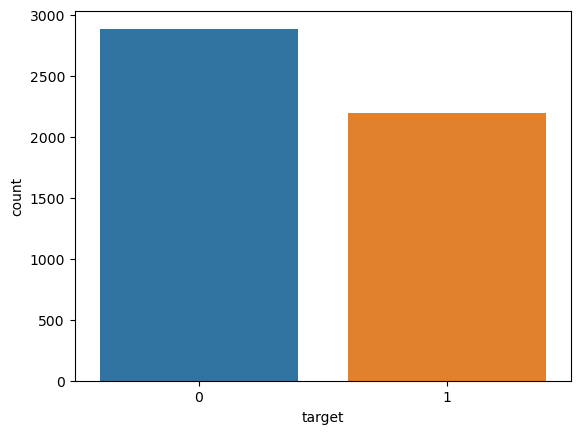

In [11]:
plt.figure()
sns.countplot(x = 'target', data = data)

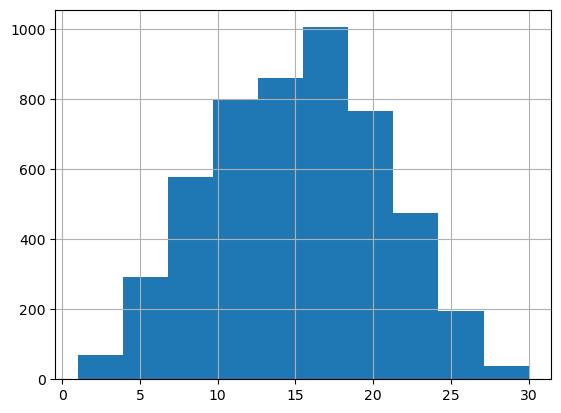

In [12]:
#Histogram for number of words
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()
plot_word_number_histogram(data['text'])

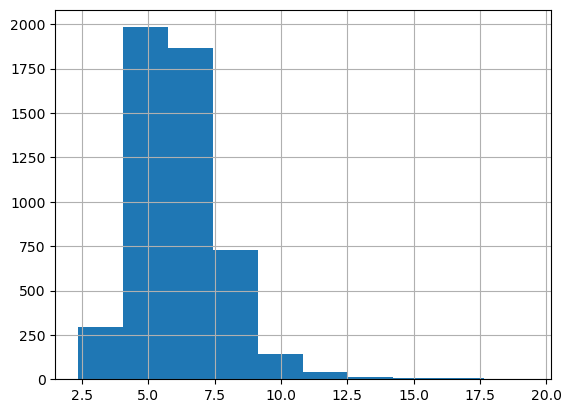

In [13]:
#Average word length in each sentence is
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()
plot_word_length_histogram(data['text'])

In [14]:
#Cleaning the data
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

data = standardize_text(data, "text")

data.head()

/tmp/ipykernel_20/262015213.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df[text_field] = df[text_field].str.replace(r"http\S+", "")
/tmp/ipykernel_20/262015213.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[text_field] = df[text_field].str.replace(r"@\S+", "")
/tmp/ipykernel_20/262015213.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")


,id,keyword,location,text,target
31,48,ablaze,Birmingham,wholesale markets ablaze,1
32,49,ablaze,Est. September 2012 - Bristol,we always try to bring the heavy metal rt,0
33,50,ablaze,AFRICA,africanbaze breaking news nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",crying out for more! set me ablaze,0
35,53,ablaze,"London, UK",on plus side look at the sky last night it was...,0


In [15]:
#Checking the balence of our classes
data.groupby("target").count()

,id,keyword,location,text
target,,,,
0,2884,2884,2884,2884
1,2196,2196,2196,2196


In [16]:
#Since the blance is not equal, we are making it equal
data_target_0 = data[data['target'] == 0]
data_target_1 = data[data['target'] == 1]

# Find the number of samples in the minority class
n_samples = min(len(data_target_0), len(data_target_1))

# Randomly sample from the majority class to get the same number of samples as the minority class
data_target_0 = data_target_0.sample(n=n_samples, random_state=0)
data_target_1 = data_target_1.sample(n=n_samples, random_state=0)

# Concatenate the two DataFrames to get the final balanced DataFrame
data = pd.concat([data_target_0, data_target_1])
data.reset_index(drop=True, inplace=True)

In [17]:
data

,id,keyword,location,text,target
0,2752,crushed,"Liberty Lake, WA",'13 m chapoutier crozes hermitage so much pur...,0
1,5249,fatality,TX,fatality scary af probably not the best falco...,0
2,819,battle,"West Richland, WA",interested to see who will win this battle,0
3,8837,sirens,Australia,marketforce s cat shark wins sirens ro...,0
4,438,apocalypse,Las Vegas,i know where to go when the zombies take over!!,0
...,...,...,...,...,...
4387,5148,fatal,Also follow ?,boy 11 charged with manslaughter in shooting d...,1
4388,8633,seismic,"Mogadishu, Somalia",exploration takes seismic shift in gabon to ...,1
4389,4077,displaced,Pedophile hunting ground,potus strategicpatience is a strategy for g...,1
4390,4356,earthquake,One World,some of the aftershocks can be just as big as ...,1


In [18]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

data["tokens"] = data["text"].apply(tokenizer.tokenize)
data.head()

,id,keyword,location,text,target,tokens
0,2752,crushed,"Liberty Lake, WA",'13 m chapoutier crozes hermitage so much pur...,0,"[13, m, chapoutier, crozes, hermitage, so, muc..."
1,5249,fatality,TX,fatality scary af probably not the best falco...,0,"[fatality, scary, af, probably, not, the, best..."
2,819,battle,"West Richland, WA",interested to see who will win this battle,0,"[interested, to, see, who, will, win, this, ba..."
3,8837,sirens,Australia,marketforce s cat shark wins sirens ro...,0,"[marketforce, s, cat, shark, wins, sirens, rou..."
4,438,apocalypse,Las Vegas,i know where to go when the zombies take over!!,0,"[i, know, where, to, go, when, the, zombies, t..."


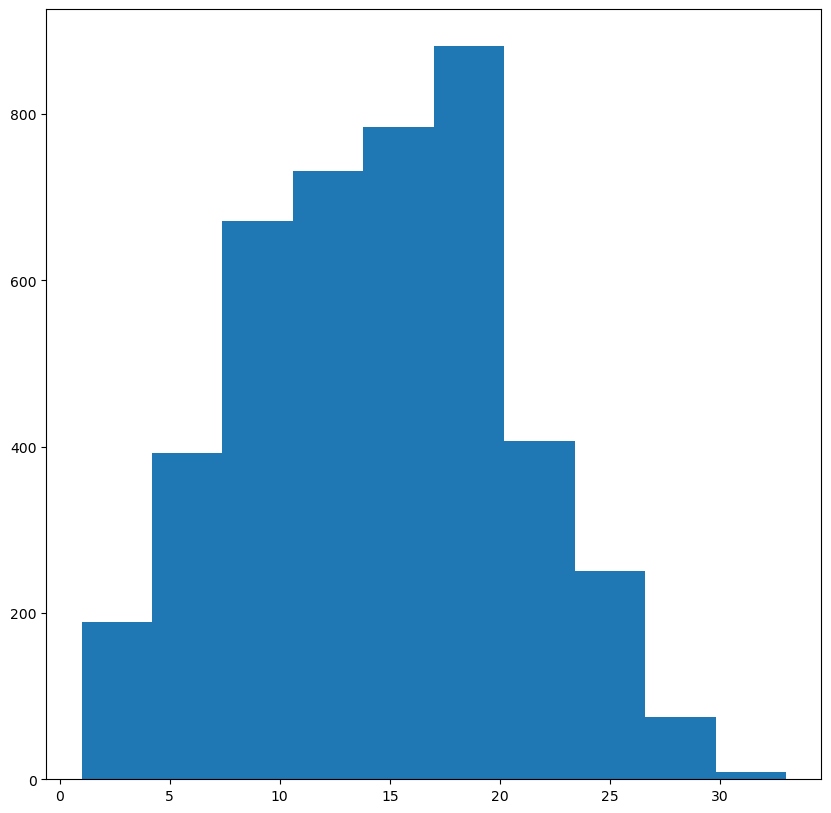

In [19]:
fig = plt.figure(figsize=(10,10))
sent = [len(tokens) for tokens in data['tokens']]
plt.hist(sent)
plt.show()

In [20]:
#Lemmatization
import re
import nltk
from nltk.stem import WordNetLemmatizer
corpus = []
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data['text'][i])
  review = review.lower()
  review = review.split()
  lemmatizer = WordNetLemmatizer()
  review = ' '.join(review)
  corpus.append(review)

In [21]:
#Feature extraction using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500,stop_words='english')
X = cv.fit_transform(corpus).toarray()
y = data['target']
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
len(X[0])

1500

In [23]:
#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [24]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Model selection

In [25]:
#Training the dataset with different models
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

svc = SVC()
gaussian = GaussianNB()
cart_model = DecisionTreeClassifier(criterion='gini', random_state=0)
maxent_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=0,max_iter=1000)

model_list = {'GaussianNB':gaussian,'SVC':svc,'CART': cart_model , 'Maximum Entropy': maxent_model}


for model_name,model in model_list.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model_name,accuracy_score(y_test, y_pred))

GaussianNB 0.7040072859744991
SVC 0.785063752276867
CART 0.7176684881602914
Maximum Entropy 0.7604735883424408


In [26]:
final_model = SVC()
final_model.fit(X_train,y_train)
y_pred = final_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.785063752276867


In [27]:
final_model.score(X_train, y_train)

0.9262295081967213

In [28]:
final_model.score(X_test, y_test)

0.785063752276867

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       558
           1       0.82      0.73      0.77       540

    accuracy                           0.79      1098
   macro avg       0.79      0.78      0.78      1098
weighted avg       0.79      0.79      0.78      1098

